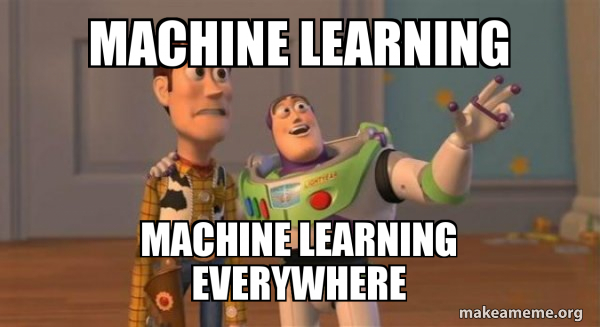

# What I will cover in this notebook
1. [Data Preprocessing](#1)
2. [Data Visualization](#2)
3. [Data Preprocessing for ml model](#3)
4. Predict rating of newly opened restaurants
5. Will create a Recommendation system though not sure weather in this notebook or not

* [Reference](#69)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('../input/zomato-bangalore-restaurants/zomato.csv')
df.head(2)

In [ ]:
a,b=df.shape
print('Data Point= ',a*b)
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

<a id=1>

# Data Preprocessing

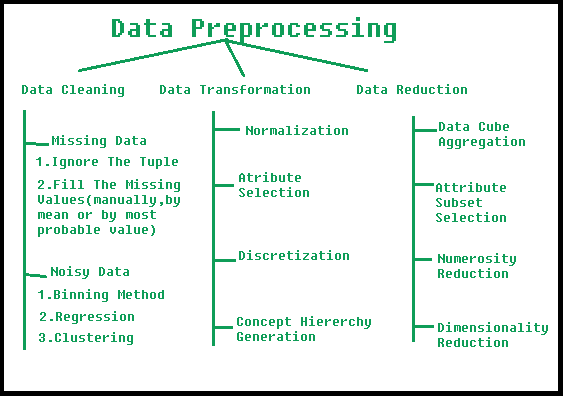
    
[Image Source](https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/)

In [ ]:
# Dropping Url and Phone no as they are useless for this project


df.drop(['url','phone','dish_liked'], axis =1, inplace=True)

In [ ]:
# Dropping duplicates.

print('Number of Dublicate values in Data Frame = ',df.duplicated().sum())
df.drop_duplicates(inplace=True)

In [ ]:
# Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)

In [ ]:
# clean Rating column
#Removing '/5' from Rates

df['rate'].unique()
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head()

In [ ]:
# Cleaning individual columns.


# Cost for 2 people is in object data type we need to convert it to int
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',','.'))
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)
df.info()

In [ ]:
# Checking no of resturants listed on Zomato
# There are 8792 resturants listed on Zomato in Bangalore city


# k = df.name.unique()
# len(k)

df.name.value_counts()

<a id=2>
    
# Visualization

In [ ]:
df.location.value_counts()
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot('location', data=df);

In [ ]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot('listed_in(city)', data=df);

In [ ]:
# Famous restaurant chains in Bengaluru
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:25]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("25 Most Famous restaurant chains in Bangaluru on Zomato",size=20,pad=20)
plt.xlabel("Number of outlets",size=15);

In [ ]:
df['listed_in(city)'].value_counts()

In [ ]:
df['listed_in(type)'].value_counts()

In [ ]:
pie, ax = plt.subplots(figsize=[12,8])
plt.subplot(1,2,1)
labels = df['listed_in(type)'].value_counts().keys()
plt.pie(x=df['listed_in(type)'].value_counts(), autopct="%.1f%%", explode=[0.05]*7, labels=labels, pctdistance=0.5,shadow=True)
plt.title("Resturant listed by", fontsize=14);
pie.savefig("Resturant listed by.png")

plt.subplot(1,2,2)
labels = df['rest_type'].value_counts()[:15].keys()
plt.pie(x=df['rest_type'].value_counts()[:15], autopct="%.1f%%", explode=[0.05]*15, labels=labels, pctdistance=0.5,shadow=True)
plt.title("Resturant by Food type", fontsize=14);
pie.savefig("Resturant by Food type.png")

plt.tight_layout()

In [ ]:
plt.subplot(1,2,1)
sns.countplot('book_table', data=df)

plt.subplot(1,2,2)
sns.countplot('online_order', data=df)


plt.tight_layout()



In [ ]:
cu = df['cuisines'].value_counts()[:12] # top 12
plt.figure(figsize=(8,4))
plt.grid(True)
sns.barplot(cu,cu.index)

In [ ]:
print('Mean cost for eating for 2 person = ', df['approx_cost(for two people)'].mean())

In [ ]:
plt.figure(figsize=(15,4))
plt.suptitle("Cost of meal for 2", fontweight='bold', fontsize=15)

plt.subplot(1,3,1)
sns.distplot(df['approx_cost(for two people)'])

plt.subplot(1,3,2)
sns.boxplot(x=df['approx_cost(for two people)'])

plt.subplot(1,3,3)
df['approx_cost(for two people)'].hist()

plt.tight_layout()

In [ ]:
plt.figure(figsize=(15,4))
plt.suptitle("Votes", fontweight='bold', fontsize=15)

plt.subplot(1,3,1)
sns.distplot(df['votes'])

plt.subplot(1,3,2)
sns.boxplot(x=df['votes'])

plt.subplot(1,3,3)
df.votes.hist()

plt.tight_layout()

In [ ]:
plt.figure(figsize=(15,4))
plt.suptitle("Rating", fontweight='bold', fontsize=15)

plt.subplot(1,3,1)
sns.distplot(df['rate'])

plt.subplot(1,3,2)
sns.boxplot(x=df['rate'])

plt.subplot(1,3,3)
df.rate.hist()

plt.tight_layout()

<a id=3>
    
# Pre-procesing for Machine Learning

In [ ]:
#Encode the input Variables
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'approx_cost(for two people)', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

zomato = Encode(df.copy())
zomato.head(2)

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(zomato.corr(), annot=True);

# In next update I will add
1. Mutual Information
2. Machine learning to predict rating of newly opened resturant.

### **RECOMMENDATION SYSTEM** (Not sure will add in this notebook or new)

In [ ]:
# Mutual Information 


In [ ]:
df.head(3)

<a id=69>

# Reference

* [For EDA](https://www.kaggle.com/chirag9073/zomato-restaurants-analysis-and-prediction#Regression-Analysis)

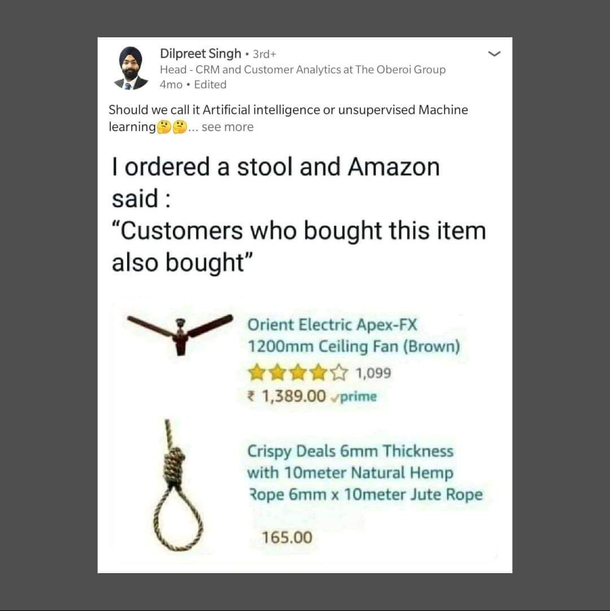